In [1]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS
import CALCULATE
from joblib import Parallel, delayed
import importlib
#importlib.reload(ASYMMETRY)

Welcome to JupyROOT 6.26/06


In [2]:
muN=1.9103 #minus

In [3]:
import sys
import re

class Filter:
    def __init__(self):
        self.old_stderr = sys.stderr
        sys.stderr = self

    def write(self, message):
        # Change the pattern here to match the specific ROOT errors
        if not re.search(r"Error in <TList::Clear>:", message):
            self.old_stderr.write(message)

    def flush(self):
        pass

# Apply the filter
filter = Filter()



Error in <THashList::Delete>: A list is accessing an object (0x872bb70) already deleted (list name = THashList)


In [4]:
pas="1"
config="2"

# Cuts

In [5]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Q2: {Q2}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: 0
W2max: 1.5
dxmin: -0.481
dxmax: 0.498
dymin: -0.822
dymax: 0.8
dybgmin: -1.4
dybgmax: 1.4
Q2: 3
Coin Min: 91 Coin Max: 109


In [6]:
cut="w2"
value=[W2min,W2max]
NUMBER=32

In [7]:
#w2
cutw2="w2"
valuemaxw2=np.linspace(.8,2.3,NUMBER)
valueminw2=np.linspace(0,0,NUMBER)

valuew2=np.transpose(np.stack([valueminw2,valuemaxw2],axis=0))

#dy
cutdy="dy"
valuemaxdy=np.linspace(.4,1.1,NUMBER)
valuemindy=np.linspace(-.4,-1.1,NUMBER)
valuedy=np.transpose(np.stack([valuemindy,valuemaxdy],axis=0))

#dx
cutdx="dx"
valuemaxdx=np.linspace(0.2,.6,NUMBER)
valuemindx=np.linspace(-.2,-.6,NUMBER)
valuedx=np.transpose(np.stack([valuemindx,valuemaxdx],axis=0))


# Calculate Raw Asymmetry, Fit dx and determine fA for bg,proton,accidentals- Calc Aphys

In [8]:
def Function_APHYSSENS(config,cut,value):
    import ROOT as r
    import math
    import array
    import os
    import sys
    import matplotlib.pyplot as plt
    import numpy as np
    

    #______________Add include directory_______________
    current_dir = os.getcwd()
    include_dir = os.path.join(current_dir, '../include')
    sys.path.insert(0, include_dir)
    #__________________________________________________
    import ERROR
    import CONFIG
    import DBPARSE
    import ASYMMETRY 
    import UTILITIES 
    from SIMFITS import DistributionFits
    from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
    import CALCULATE
    import CORRECTIONS
    from joblib import Parallel, delayed
    
    dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
    dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
    lower_bound=dxmin
    upper_bound=dxmax
    Raw=ASYMMETRY.Function_ASYMMETRYSENS(config,cut,value)
    print("Raw Asymmetry Calculated")
    
    Fit=ASYMMETRY.Function_FITDXSENS(config,cut,value)
    print("dx Histogram Fit Completed")
    
    data,bg,totalFit,simp,simn=Fit
    bin_centers,bin_contents=bg
    numBG=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    bin_centers,bin_contents=totalFit
    numTotal=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    bin_centers,bin_contents=simp
    numP=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    
    accResult,bgResult,fp=CORRECTIONS.Function_ANALYZEROOTFILE(config,bg,simp,totalFit)
    print(f"AccResult: {accResult}")
    bin_centers,bin_contents=simn
    Y=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
    TrueYield=Raw[3]
    print("f A combinations Determined")
    
    Phys=ASYMMETRY.Function_APHYS(config,pas,Raw,accResult,bgResult,fp)
    print("Aphys Calculated")
    
    weighted_A,weighted_A_E,fbackg,rawA,rawAE=Phys
    print('Returned: Aphys, Aphys_E, fbg, cut, cutvalue')
    R,RE=CALCULATE.Function_CALCGEN(config,weighted_A,weighted_A_E)
    return weighted_A,weighted_A_E,fbackg,cut,value,Y,R,RE,rawA,rawAE,np.mean(Raw[1])

In [9]:
#Results=Function_APHYSSENS(config,cut,value)

In [10]:
#Results[2]

In [11]:
#Raw
#print(Results[8])


In [12]:
#A_phys
#print(Results[0])


In [13]:
#rat
#print(Results[6]*muN)
#print(Results[7])

In [14]:
#1.200691023930045

# GEN2__________________________________________________________

In [15]:
config="2"

# W2

In [16]:
%%time
n_jobs = -1  # Use all available CPU cores
Results2w2 = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutw2,val) for (val) in valuew2)

CPU times: user 255 ms, sys: 300 ms, total: 555 ms
Wall time: 7min 4s


In [17]:
A_result_2w2=np.empty(0)
E_result_2w2=np.empty(0)
fbg_result_2w2=np.empty(0)
cut_result_2w2=np.empty(0)
w2_2=np.empty(0)
Y_2w2=np.empty(0)
R_2w2=np.empty(0)
RE_2w2=np.empty(0)

for i in range(0,len(Results2w2)):
    A_result_2w2=np.append(A_result_2w2,Results2w2[i][0])
    E_result_2w2=np.append(E_result_2w2,Results2w2[i][1])  
    fbg_result_2w2=np.append(fbg_result_2w2,Results2w2[i][2])
    cut_result_2w2=np.append(cut_result_2w2,Results2w2[i][3])
    w2_2=np.append(w2_2,Results2w2[i][4][1])
    Y_2w2=np.append(Y_2w2,Results2w2[i][5])
    R_2w2=np.append(R_2w2,Results2w2[i][6])
    RE_2w2=np.append(RE_2w2,Results2w2[i][7])

In [18]:
RE_2w2

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, -0.04156805,
       -0.04108758, -0.04090127, -0.04078993, -0.04077805, -0.04105607,
       -0.04131171, -0.04152409, -0.04194388, -0.04241206, -0.04268161,
       -0.04312748, -0.04332818, -0.04363902, -0.04389015, -0.04399621,
       -0.04409823, -0.04414733, -0.04412675, -0.04411873, -0.04411873,
       -0.04411873, -0.04411873])

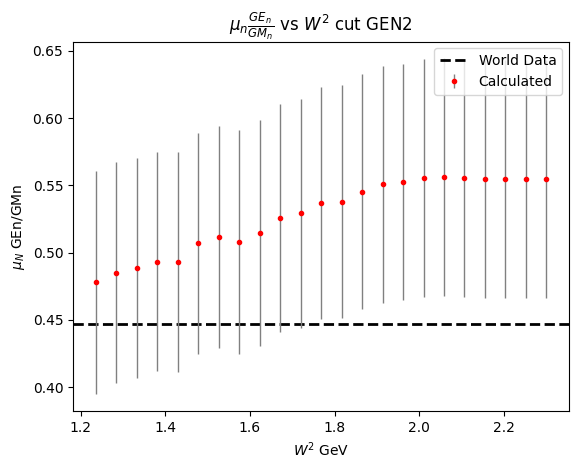

In [19]:
config="2"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(w2_2,2*abs(R_2w2),2*abs(RE_2w2),fmt='.',ecolor='grey',color='red',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $W^2$ cut GEN'+config)
plt.xlabel("$W^2$ GeV")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_w2.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_w2.npy', {
    'R': 2*abs(R_2w2),
    'RE': 2*abs(RE_2w2),
    'cut': w2_2,
},allow_pickle=True)


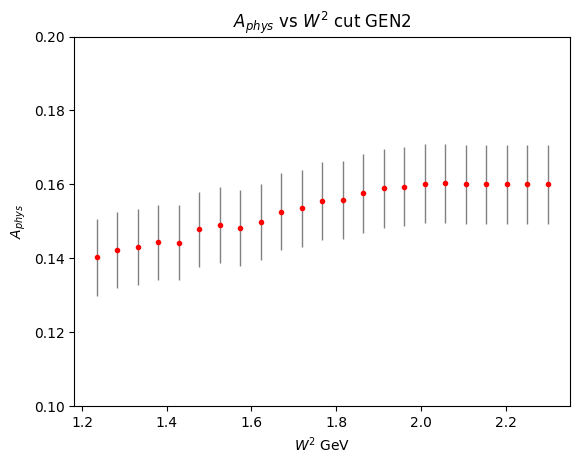

In [20]:

config="2"
plt.errorbar(w2_2,A_result_2w2,E_result_2w2,fmt='.',ecolor='grey',color='red',lw=1)
#plt.plot(w2_2,Y_2)
#plt.yscale('log')
plt.ylim(.1,.2)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("$W^2$ GeV")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_w2.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_w2.npy', {
    'A': A_result_2w2,
    'AE': E_result_2w2,
    'cut': w2_2,
},allow_pickle=True)

# dY

In [21]:
%%time
n_jobs = -1  # Use all available CPU cores
Results2dy = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdy,val) for (val) in valuedy)

CPU times: user 233 ms, sys: 179 ms, total: 411 ms
Wall time: 7min 4s


In [22]:
A_result_2dy=np.empty(0)
E_result_2dy=np.empty(0)
fbg_result_2dy=np.empty(0)
cut_result_2dy=np.empty(0)
dy_2=np.empty(0)
Y_2dy=np.empty(0)
R_2dy=np.empty(0)
RE_2dy=np.empty(0)

for i in range(0,len(Results2dy)):
    A_result_2dy=np.append(A_result_2dy,Results2dy[i][0])
    E_result_2dy=np.append(E_result_2dy,Results2dy[i][1])  
    fbg_result_2dy=np.append(fbg_result_2dy,Results2dy[i][2])
    cut_result_2dy=np.append(cut_result_2dy,Results2dy[i][3])
    dy_2=np.append(dy_2,Results2dy[i][4][1])
    Y_2dy=np.append(Y_2dy,Results2dy[i][5])
    R_2dy=np.append(R_2dy,Results2dy[i][6])
    RE_2dy=np.append(RE_2dy,Results2dy[i][7])

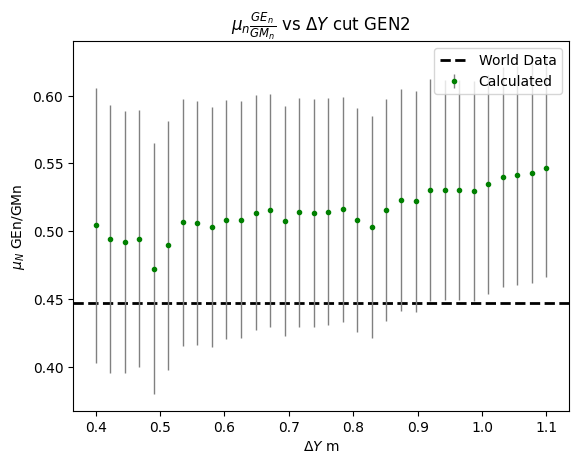

In [23]:
config="2"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(dy_2,2*abs(R_2dy),2*abs(RE_2dy),fmt='.',ecolor='grey',color='green',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $\Delta Y$ cut GEN'+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_dy.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_dy.npy', {
    'R': 2*abs(R_2dy),
    'RE': 2*abs(RE_2dy),
    'cut': w2_2,
},allow_pickle=True)


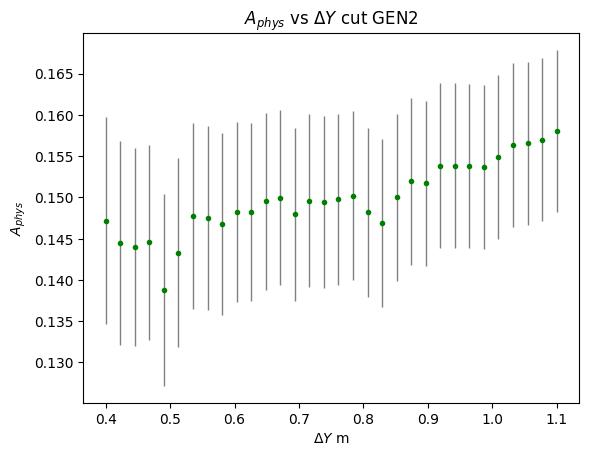

In [24]:
config="2"
plt.errorbar(dy_2,A_result_2dy,E_result_2dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dy.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dy.npy', {
    'A': A_result_2dy,
    'AE': E_result_2dy,
    'cut': dy_2,
},allow_pickle=True)

# dx

In [25]:
%%time
n_jobs = -1  # Use all available CPU cores
Results2dx = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdx,val) for (val) in valuedx)

CPU times: user 208 ms, sys: 194 ms, total: 402 ms
Wall time: 7min 3s


In [26]:
A_result_2dx=np.empty(0)
E_result_2dx=np.empty(0)
fbg_result_2dx=np.empty(0)
cut_result_2dx=np.empty(0)
dx_2=np.empty(0)
Y_2dx=np.empty(0)
R_2dx=np.empty(0)
RE_2dx=np.empty(0)

for i in range(0,len(Results2dx)):
    A_result_2dx=np.append(A_result_2dx,Results2dx[i][0])
    E_result_2dx=np.append(E_result_2dx,Results2dx[i][1])  
    fbg_result_2dx=np.append(fbg_result_2dx,Results2dx[i][2])
    cut_result_2dx=np.append(cut_result_2dx,Results2dx[i][3])
    dx_2=np.append(dx_2,Results2dx[i][4][1])
    Y_2dx=np.append(Y_2dx,Results2dx[i][5])
    R_2dx=np.append(R_2dx,Results2dx[i][6])
    RE_2dx=np.append(RE_2dx,Results2dx[i][7])

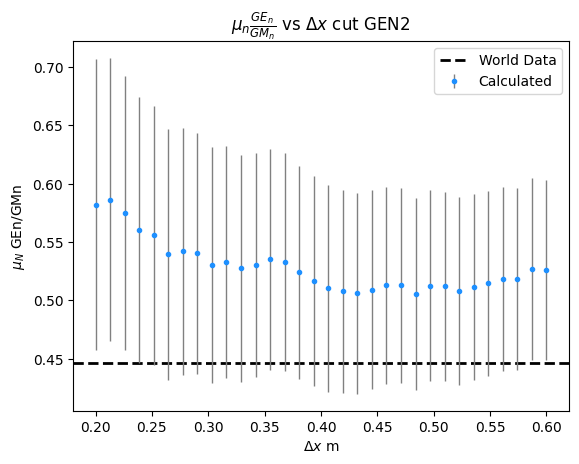

In [27]:
config="2"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(dx_2,2*abs(R_2dx),2*abs(RE_2dx),fmt='.',ecolor='grey',color='dodgerblue',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $\Delta x$ cut GEN'+config)
plt.xlabel("$\Delta x$ m")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_dx.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_dx.npy', {
    'R': 2*abs(R_2dx),
    'RE': 2*abs(RE_2dx),
    'cut': dx_2,
},allow_pickle=True)

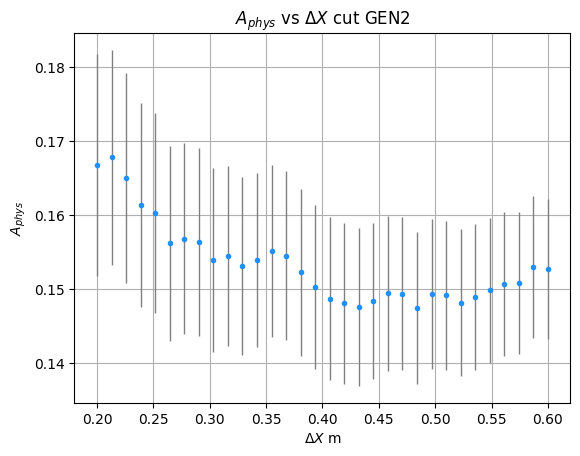

In [28]:
config="2"
plt.errorbar(dx_2,A_result_2dx,E_result_2dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("$\Delta X$ m")
plt.grid()
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dx.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dx.npy', {
    'A': A_result_2dx,
    'AE': E_result_2dx,
    'cut': dx_2,
},allow_pickle=True)

# GEN3___________________________________________________________

In [29]:
config="3"

# W2

In [30]:
%%time
pas="1"
n_jobs = -1  # Use all available CPU cores
Results3 = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutw2,val) for (val) in valuew2)



CPU times: user 229 ms, sys: 193 ms, total: 421 ms
Wall time: 7min 12s


In [31]:
A_result_3=np.empty(0)
E_result_3=np.empty(0)
fbg_result_3=np.empty(0)
cut_result_3=np.empty(0)
w2_3=np.empty(0)
Y_3=np.empty(0)
R_3w2=np.empty(0)
RE_3w2=np.empty(0)

for i in range(0,len(Results3)):
    A_result_3=np.append(A_result_3,Results3[i][0])
    E_result_3=np.append(E_result_3,Results3[i][1])  
    fbg_result_3=np.append(fbg_result_3,Results3[i][2])
    cut_result_3=np.append(cut_result_3,Results3[i][3])
    w2_3=np.append(w2_3,Results3[i][4][1])
    Y_3=np.append(Y_3,Results3[i][5])
    R_3w2=np.append(R_3w2,Results3[i][6])
    RE_3w2=np.append(RE_3w2,Results3[i][7])

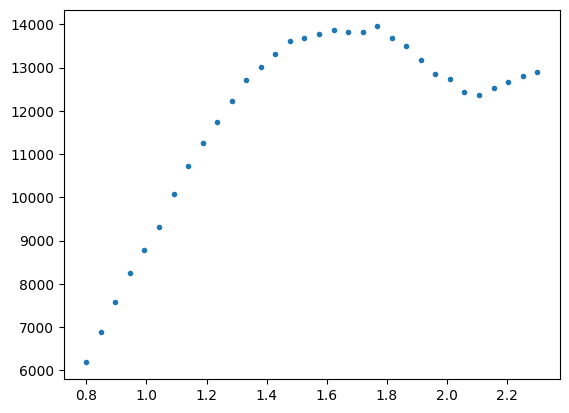

In [32]:
plt.plot(w2_3,Y_3,'.')

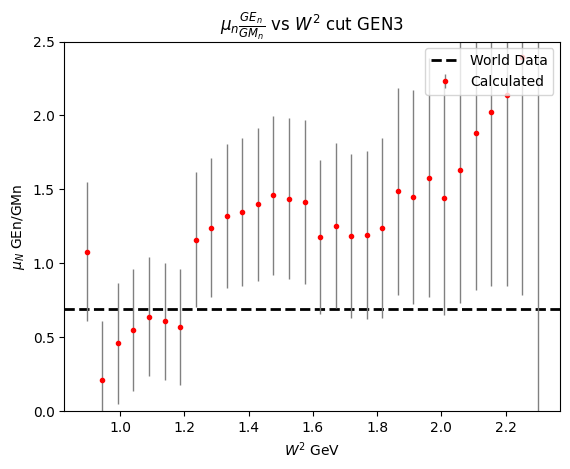

In [34]:
config="3"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(w2_3,2*abs(R_3w2),2*abs(RE_3w2),fmt='.',ecolor='grey',color='red',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $W^2$ cut GEN'+config)
plt.xlabel("$W^2$ GeV")
plt.ylim(0,2.5)
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_w2.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_w2.npy', {
    'R': 2*abs(R_3w2),
    'RE': 2*abs(RE_3w2),
    'cut': w2_3,
},allow_pickle=True)

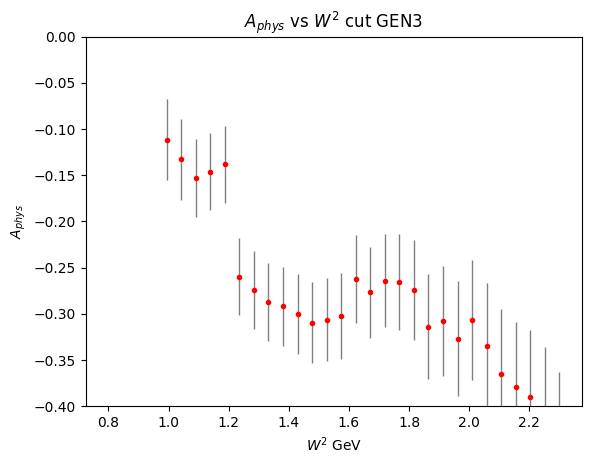

In [35]:
config="3"
plt.errorbar(w2_3,A_result_3,E_result_3,fmt='.',ecolor='grey',color='red',lw=1)
plt.ylim(-.4,0)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("$W^2$ GeV")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_w2.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_w2.npy', {
    'A': A_result_3,
    'AE': E_result_3,
    'cut': w2_3,
},allow_pickle=True)

# dy

In [36]:
%%time
n_jobs = -1  # Use all available CPU cores
Results3dy = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdy,val) for (val) in valuedy)

CPU times: user 259 ms, sys: 234 ms, total: 493 ms
Wall time: 7min 23s


In [37]:
A_result_3dy=np.empty(0)
E_result_3dy=np.empty(0)
fbg_result_3dy=np.empty(0)
cut_result_3dy=np.empty(0)
dy_3=np.empty(0)
Y_3dy=np.empty(0)
R_3dy=np.empty(0)
RE_3dy=np.empty(0)

for i in range(0,len(Results3dy)):
    A_result_3dy=np.append(A_result_3dy,Results3dy[i][0])
    E_result_3dy=np.append(E_result_3dy,Results3dy[i][1])  
    fbg_result_3dy=np.append(fbg_result_3dy,Results3dy[i][2])
    cut_result_3dy=np.append(cut_result_3dy,Results3dy[i][3])
    dy_3=np.append(dy_3,Results3dy[i][4][1])
    Y_3dy=np.append(Y_3dy,Results3dy[i][5])
    R_3dy=np.append(R_3dy,Results3dy[i][6])
    RE_3dy=np.append(RE_3dy,Results3dy[i][7])

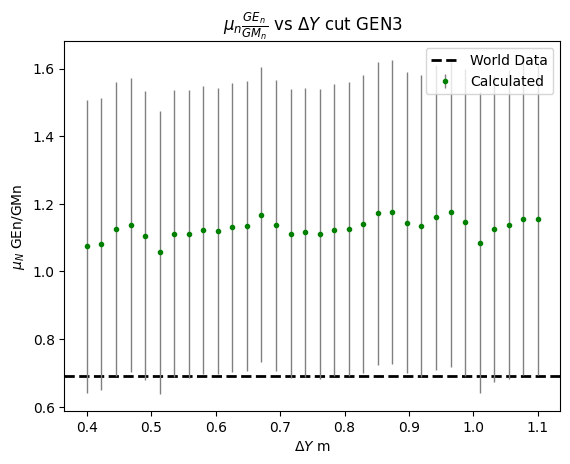

In [38]:
config="3"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(dy_3,2*abs(R_3dy),2*abs(RE_3dy),fmt='.',ecolor='grey',color='green',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $\Delta Y$ cut GEN'+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_dy.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_dy.npy', {
    'R': 2*abs(R_3dy),
    'RE': 2*abs(RE_3dy),
    'cut': dy_3,
},allow_pickle=True)


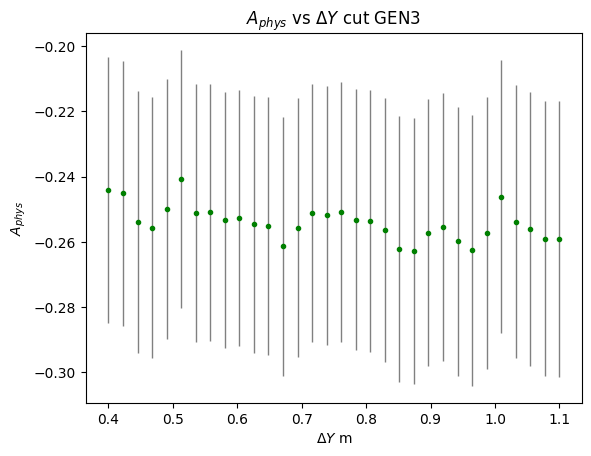

In [39]:
config="3"
plt.errorbar(dy_3,A_result_3dy,E_result_3dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel("$A_{phys}$")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dy.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dy.npy', {
    'A': A_result_3dy,
    'AE': E_result_3dy,
    'cut': dy_3,
},allow_pickle=True)

# dx

In [40]:
%%time
n_jobs = -1  # Use all available CPU cores
Results3dx = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdx,val) for (val) in valuedx)

CPU times: user 221 ms, sys: 190 ms, total: 411 ms
Wall time: 7min 6s


In [41]:
A_result_3dx=np.empty(0)
E_result_3dx=np.empty(0)
fbg_result_3dx=np.empty(0)
cut_result_3dx=np.empty(0)
dx_3=np.empty(0)
Y_3dx=np.empty(0)
R_3dx=np.empty(0)
RE_3dx=np.empty(0)

for i in range(0,len(Results3dx)):
    A_result_3dx=np.append(A_result_3dx,Results3dx[i][0])
    E_result_3dx=np.append(E_result_3dx,Results3dx[i][1])  
    fbg_result_3dx=np.append(fbg_result_3dx,Results3dx[i][2])
    cut_result_3dx=np.append(cut_result_3dx,Results3dx[i][3])
    dx_3=np.append(dx_3,Results3dx[i][4][1])
    Y_3dx=np.append(Y_3dx,Results3dx[i][5])
    R_3dx=np.append(R_3dx,Results3dx[i][6])
    RE_3dx=np.append(RE_3dx,Results3dx[i][7])

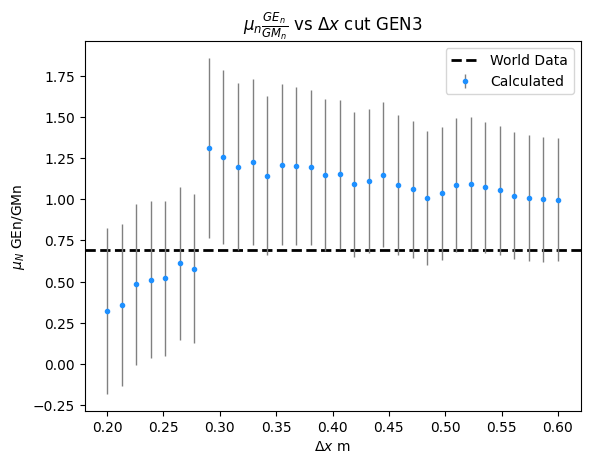

In [42]:
config="3"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(dx_3,2*abs(R_3dx),2*abs(RE_3dx),fmt='.',ecolor='grey',color='dodgerblue',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $\Delta x$ cut GEN'+config)
plt.xlabel("$\Delta x$ m")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_dx.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_dx.npy', {
    'R': 2*abs(R_3dx),
    'RE': 2*abs(RE_3dx),
    'cut': dx_3,
},allow_pickle=True)

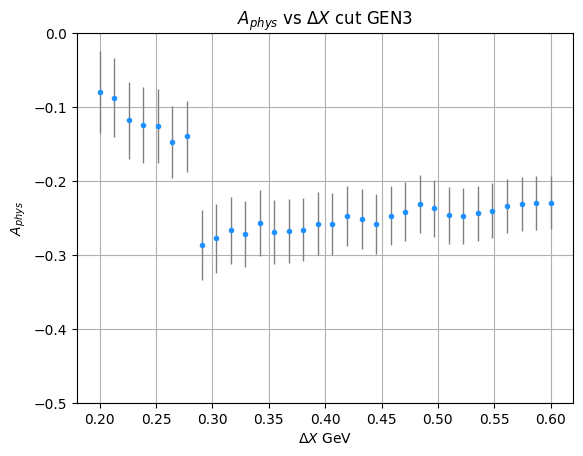

In [43]:
config="3"
plt.errorbar(dx_3,A_result_3dx,E_result_3dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("$\Delta X$ GeV")
plt.ylabel("$A_{phys}$")
plt.ylim(-.5,0)
plt.grid()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dx.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/APHYS_dx.npy', {
    'A': A_result_3dx,
    'AE': E_result_3dx,
    'cut': dx_3,
},allow_pickle=True)

# GEN4

# W2

In [44]:
config="4"

In [45]:
%%time
pas="1"
n_jobs = -1  # Use all available CPU cores
Results4= Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutw2,val) for (val) in valuew2)

CPU times: user 97.3 ms, sys: 62.6 ms, total: 160 ms
Wall time: 2min 22s


In [46]:
A_result_4=np.empty(0)
E_result_4=np.empty(0)
fbg_result_4=np.empty(0)
cut_result_4=np.empty(0)
w2_4=np.empty(0)
Y_4=np.empty(0)
R_4w2=np.empty(0)
RE_4w2=np.empty(0)

for i in range(0,len(Results4)):
    A_result_4=np.append(A_result_4,Results4[i][0])
    E_result_4=np.append(E_result_4,Results4[i][1])  
    fbg_result_4=np.append(fbg_result_4,Results4[i][2])
    cut_result_4=np.append(cut_result_4,Results4[i][3])
    w2_4=np.append(w2_4,Results4[i][4][1])
    Y_4=np.append(Y_4,Results4[i][5])
    R_4w2=np.append(R_4w2,Results4[i][6])
    RE_4w2=np.append(RE_4w2,Results4[i][7])

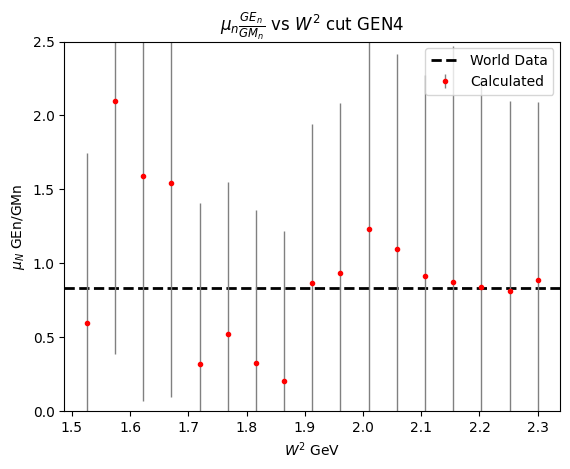

In [47]:
config="4"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(w2_4,2*abs(R_4w2),2*abs(RE_4w2),fmt='.',ecolor='grey',color='red',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $W^2$ cut GEN'+config)
plt.xlabel("$W^2$ GeV")
plt.ylim(0,2.5)
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_w2.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_w2.npy', {
    'R': 2*abs(R_4w2),
    'RE': 2*abs(RE_4w2),
    'cut': w2_4,
},allow_pickle=True)

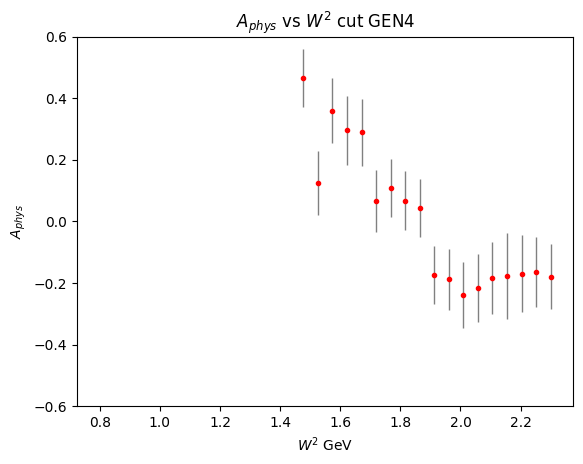

In [48]:
config="4"
plt.errorbar(w2_4,A_result_4,E_result_4,fmt='.',ecolor='grey',color='red',lw=1)
plt.title("$A_{phys}$ vs $W^2$ cut GEN"+config)
plt.xlabel("$W^2$ GeV")
plt.ylabel("$A_{phys}$")
plt.ylim(-.6,.6)
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_w2.png")

# dy

In [49]:
%%time
n_jobs = -1  # Use all available CPU cores
Results4dy = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdy,val) for (val) in valuedy)

CPU times: user 131 ms, sys: 49.9 ms, total: 180 ms
Wall time: 2min 24s


In [50]:
A_result_4dy=np.empty(0)
E_result_4dy=np.empty(0)
fbg_result_4dy=np.empty(0)
cut_result_4dy=np.empty(0)
dy_4=np.empty(0)
Y_4dy=np.empty(0)
R_4dy=np.empty(0)
RE_4dy=np.empty(0)

for i in range(0,len(Results4dy)):
    A_result_4dy=np.append(A_result_4dy,Results4dy[i][0])
    E_result_4dy=np.append(E_result_4dy,Results4dy[i][1])  
    fbg_result_4dy=np.append(fbg_result_4dy,Results4dy[i][2])
    cut_result_4dy=np.append(cut_result_4dy,Results4dy[i][3])
    dy_4=np.append(dy_4,Results4dy[i][4][1])
    Y_4dy=np.append(Y_4dy,Results4dy[i][5])
    R_4dy=np.append(R_4dy,Results4dy[i][6])
    RE_4dy=np.append(RE_4dy,Results4dy[i][7])

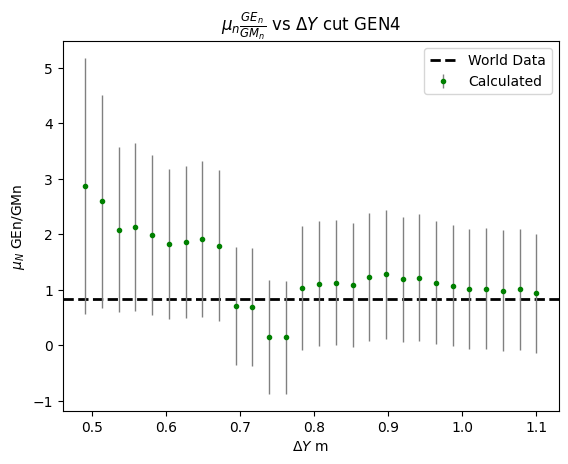

In [51]:
config="4"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(dy_4,2*abs(R_4dy),2*abs(RE_4dy),fmt='.',ecolor='grey',color='green',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $\Delta Y$ cut GEN'+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_dy.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_dy.npy', {
    'R': 2*abs(R_4dy),
    'RE': 2*abs(RE_4dy),
    'cut': dy_4,
},allow_pickle=True)

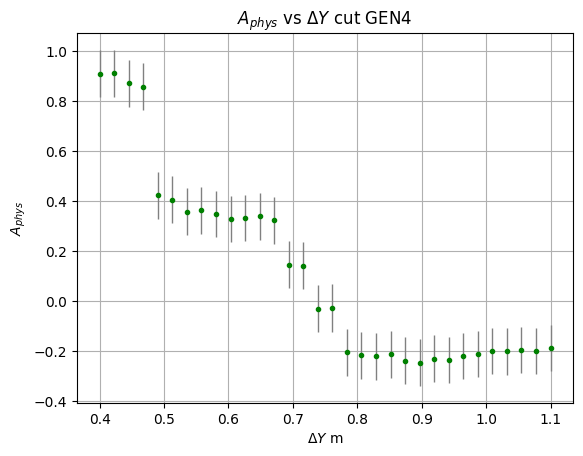

In [52]:
config="4"
plt.errorbar(dy_4,A_result_4dy,E_result_4dy,fmt='.',ecolor='grey',color='green',lw=1)
plt.title("$A_{phys}$ vs $\Delta Y$ cut GEN"+config)
plt.xlabel("$\Delta Y$ m")
plt.ylabel("$A_{phys}$")
#plt.ylim(0,.6)
plt.grid()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dy.png")

# dx

In [53]:
%%time
n_jobs = -1  # Use all available CPU cores
Results4dx = Parallel(n_jobs=n_jobs)(delayed(Function_APHYSSENS)(config,cutdx,val) for (val) in valuedx)

CPU times: user 97.1 ms, sys: 55.9 ms, total: 153 ms
Wall time: 2min 22s


In [54]:
A_result_4dx=np.empty(0)
E_result_4dx=np.empty(0)
fbg_result_4dx=np.empty(0)
cut_result_4dx=np.empty(0)
dx_4=np.empty(0)
Y_4dx=np.empty(0)
R_4dx=np.empty(0)
RE_4dx=np.empty(0)

for i in range(0,len(Results4dx)):
    A_result_4dx=np.append(A_result_4dx,Results4dx[i][0])
    E_result_4dx=np.append(E_result_4dx,Results4dx[i][1])  
    fbg_result_4dx=np.append(fbg_result_4dx,Results4dx[i][2])
    cut_result_4dx=np.append(cut_result_4dx,Results4dx[i][3])
    dx_4=np.append(dx_4,Results4dx[i][4][1])
    Y_4dx=np.append(Y_4dx,Results4dx[i][5])
    R_4dx=np.append(R_4dx,Results4dx[i][6])
    RE_4dx=np.append(RE_4dx,Results4dx[i][7])

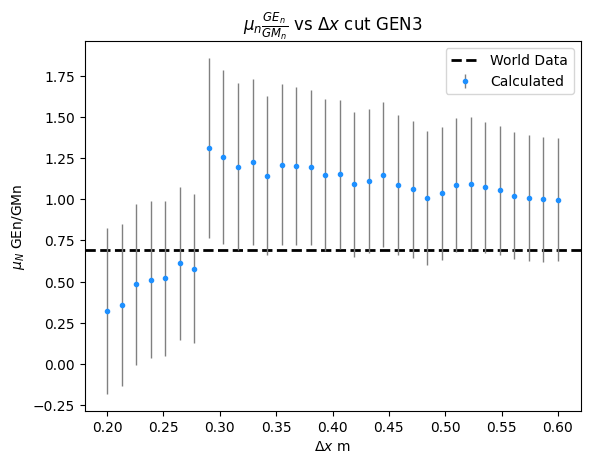

In [55]:
config="3"

Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='World Data')
plt.errorbar(dx_3,2*abs(R_3dx),2*abs(RE_3dx),fmt='.',ecolor='grey',color='dodgerblue',lw=1,label='Calculated')

plt.title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $\Delta x$ cut GEN'+config)
plt.xlabel("$\Delta x$ m")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.legend(loc="upper right")
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RatGEN_dx.png")
np.save(f'CutSensPhysArrays/Pass{pas}/GEN{config}/RatGEN_dx.npy', {
    'R': 2*abs(R_3dx),
    'RE': 2*abs(RE_3dx),
    'cut': dx_3,
},allow_pickle=True)

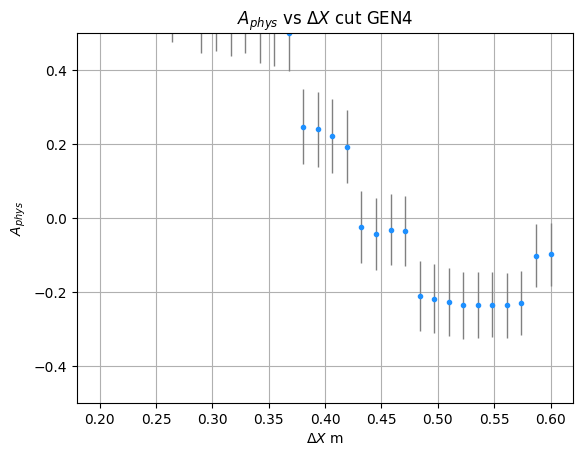

In [56]:
config="4"
plt.errorbar(dx_4,A_result_4dx,E_result_4dx,fmt='.',ecolor='grey',color='dodgerblue',lw=1)
plt.title("$A_{phys}$ vs $\Delta X$ cut GEN"+config)
plt.xlabel("$\Delta X$ m")
plt.ylabel("$A_{phys}$")
plt.ylim(-.5,.5)
plt.grid()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/APHYS_dx.png")

# Nice Plotting

In [57]:
from DXDYW2COIN import *

# GEN2 Plots

In [58]:
config="2"

dxHist2,dyHist2,w2Hist2=Function_MAKEHIST(config)

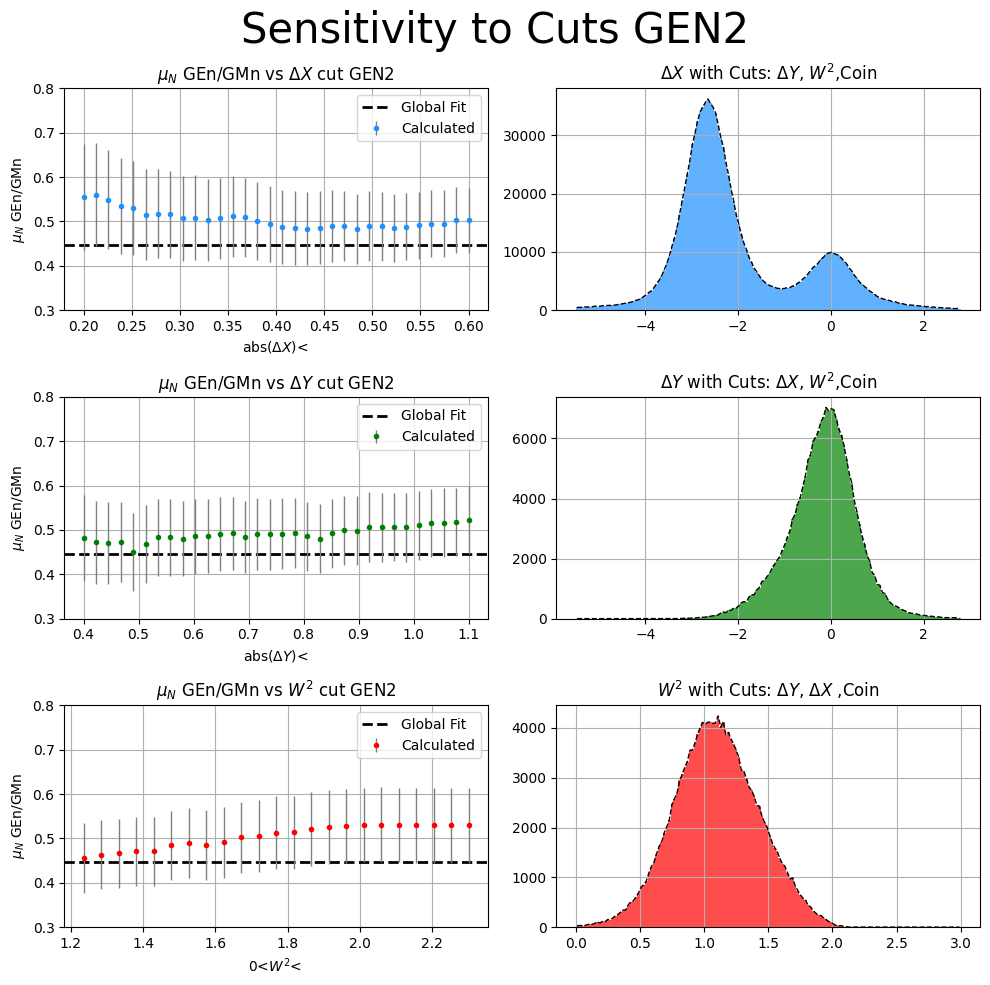

In [59]:
config="2"
lw=1
plt.figure(figsize=(10,10))
plt.suptitle('Sensitivity to Cuts GEN2', fontsize=30)

plt.subplot(3,2,1)
Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')
plt.errorbar(dx_2,muN*abs(R_2dx),muN*abs(RE_2dx),fmt='.',ecolor='grey',color='dodgerblue',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $\Delta X$ cut GEN"+config)
plt.xlabel("abs($\Delta X$)< ")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(.3,.8)
plt.grid()
plt.legend(loc="upper right")

plt.subplot(3,2,3)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')

plt.errorbar(dy_2,muN*abs(R_2dy),muN*abs(RE_2dy),fmt='.',ecolor='grey',color='green',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $\Delta Y$ cut GEN"+config)
plt.xlabel("abs($\Delta Y$)<")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(.3,.8)
plt.grid()
plt.legend(loc="upper right")

plt.subplot(3,2,5)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')
plt.grid()
plt.errorbar(w2_2,muN*abs(R_2w2),muN*abs(RE_2w2),fmt='.',ecolor='grey',color='red',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $W^2$ cut GEN"+config)
plt.xlabel("0<$W^2$< ")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(.3,.8)
plt.legend(loc="upper right")

plt.subplot(3,2,2)
plt.title("$\Delta X$ with Cuts: $\Delta Y$, $W^2$,Coin")
bin_centers,bin_contents=dxHist2
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="dodgerblue",label="$\Delta X$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,4)
plt.title("$\Delta Y$ with Cuts: $\Delta X$, $W^2$,Coin")
bin_centers,bin_contents=dyHist2
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="green",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,6)
plt.title("$W^2$ with Cuts: $\Delta Y$, $\Delta X$ ,Coin")
bin_centers,bin_contents=w2Hist2
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="red",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.tight_layout()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RAT_allcuts.png")


# GEN3 Plots

In [60]:
config="3"

dxHist3,dyHist3,w2Hist3=Function_MAKEHIST(config)

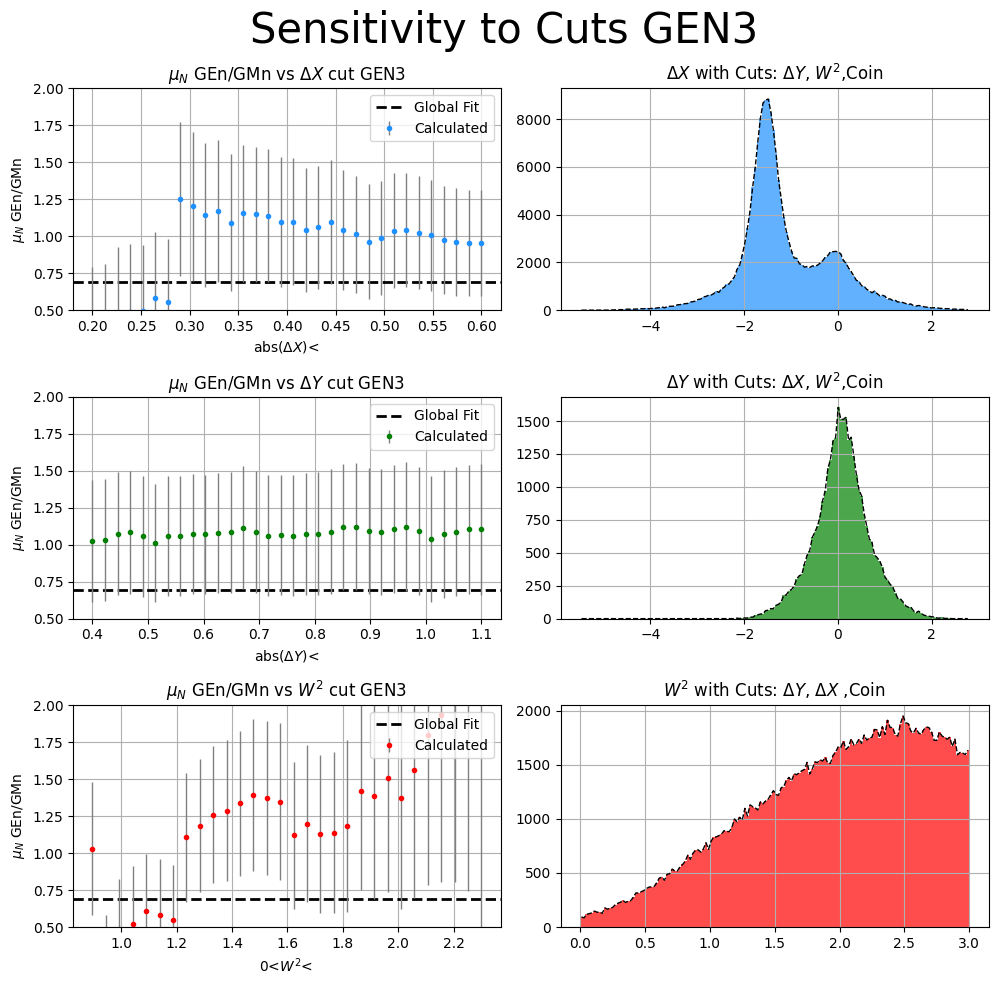

In [61]:
config="3"
lw=1
plt.figure(figsize=(10,10))
plt.suptitle('Sensitivity to Cuts GEN3', fontsize=30)

plt.subplot(3,2,1)
Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')
plt.errorbar(dx_3,muN*abs(R_3dx),muN*abs(RE_3dx),fmt='.',ecolor='grey',color='dodgerblue',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $\Delta X$ cut GEN"+config)
plt.xlabel("abs($\Delta X$)< ")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(.5,2)
plt.grid()
plt.legend(loc="upper right")

plt.subplot(3,2,3)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')

plt.errorbar(dy_3,muN*abs(R_3dy),muN*abs(RE_3dy),fmt='.',ecolor='grey',color='green',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $\Delta Y$ cut GEN"+config)
plt.xlabel("abs($\Delta Y$)<")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(.5,2)
plt.grid()
plt.legend(loc="upper right")

plt.subplot(3,2,5)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')
plt.grid()
plt.errorbar(w2_3,muN*abs(R_3w2),muN*abs(RE_3w2),fmt='.',ecolor='grey',color='red',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $W^2$ cut GEN"+config)
plt.xlabel("0<$W^2$< ")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(.5,2)
plt.legend(loc="upper right")

plt.subplot(3,2,2)
plt.title("$\Delta X$ with Cuts: $\Delta Y$, $W^2$,Coin")
bin_centers,bin_contents=dxHist3
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="dodgerblue",label="$\Delta X$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,4)
plt.title("$\Delta Y$ with Cuts: $\Delta X$, $W^2$,Coin")
bin_centers,bin_contents=dyHist3
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="green",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,6)
plt.title("$W^2$ with Cuts: $\Delta Y$, $\Delta X$ ,Coin")
bin_centers,bin_contents=w2Hist3
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="red",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.tight_layout()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RAT_allcuts.png")


# GEN4 Plots

In [62]:
config="4"

dxHist4,dyHist4,w2Hist4=Function_MAKEHIST(config)

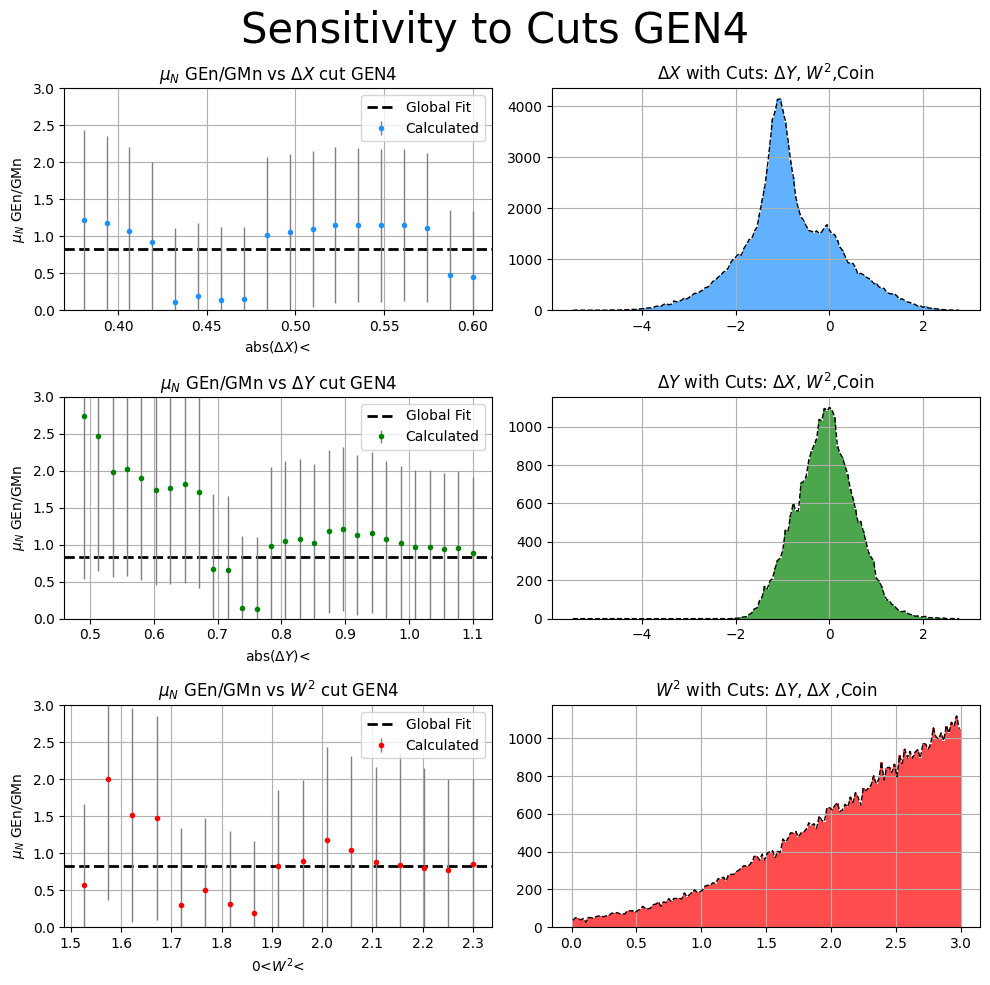

In [63]:
config="4"
lw=1
plt.figure(figsize=(10,10))
plt.suptitle('Sensitivity to Cuts GEN4', fontsize=30)

plt.subplot(3,2,1)
Q2=CONFIG.Function_JSON("Q2",f"../config/cuts{config}.cfg")
worldDat=CALCULATE.Function_GENWORLDFROMQ2(Q2)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')
plt.errorbar(dx_4,muN*abs(R_4dx),muN*abs(RE_4dx),fmt='.',ecolor='grey',color='dodgerblue',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $\Delta X$ cut GEN"+config)
plt.xlabel("abs($\Delta X$)< ")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(0,3)
plt.grid()
plt.legend(loc="upper right")

plt.subplot(3,2,3)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')

plt.errorbar(dy_4,muN*abs(R_4dy),muN*abs(RE_4dy),fmt='.',ecolor='grey',color='green',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $\Delta Y$ cut GEN"+config)
plt.xlabel("abs($\Delta Y$)<")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(0,3)
plt.grid()
plt.legend(loc="upper right")

plt.subplot(3,2,5)
plt.axhline(y=worldDat, color='black', linestyle='--', linewidth=2,label='Global Fit')
plt.grid()
plt.errorbar(w2_4,muN*abs(R_4w2),muN*abs(RE_4w2),fmt='.',ecolor='grey',color='red',lw=1,label='Calculated')
plt.title("$\mu_N$ GEn/GMn vs $W^2$ cut GEN"+config)
plt.xlabel("0<$W^2$< ")
plt.ylabel('$\mu_N$ GEn/GMn')
plt.ylim(0,3)
plt.legend(loc="upper right")

plt.subplot(3,2,2)
plt.title("$\Delta X$ with Cuts: $\Delta Y$, $W^2$,Coin")
bin_centers,bin_contents=dxHist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="dodgerblue",label="$\Delta X$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,4)
plt.title("$\Delta Y$ with Cuts: $\Delta X$, $W^2$,Coin")
bin_centers,bin_contents=dyHist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="green",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()
plt.subplot(3,2,6)
plt.title("$W^2$ with Cuts: $\Delta Y$, $\Delta X$ ,Coin")
bin_centers,bin_contents=w2Hist4
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.7,color="red",label="$\Delta Y$")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.grid()

plt.tight_layout()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/RAT_allcuts.png")
